# Importacion de librerias

In [1]:
from sklearn.cluster import KMeans
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# split para modelado
from sklearn.model_selection import train_test_split
# Scaled | Escalado
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Encoding | Codificación
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
# To save models
import json
import pickle
# Feature Selection
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.linear_model import LogisticRegression
# Métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# Optimizar
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# from tqdm import tqdm
import warnings

df = pd.read_csv("https://storage.googleapis.com/breathecode/project-files/bank-marketing-campaign-data.csv", sep=";")


# Análisis Descriptivo

<h5>age:</h5> Edad del cliente (numérico)
<h5>job:</h5> Tipo de trabajo (categórico)
<h5>marital:</h5> Estado civil (categórico)
<h5>education:</h5> Nivel de educación (categórico)
<h5>default:</h5> ¿Tiene crédito actualmente? (categórico)
<h5>housing:</h5> ¿Tiene un préstamo de vivienda? (categórico)
<h5>loan:</h5> ¿Tiene un préstamo personal? (categórico)
<h5>contact:</h5> Tipo de comunicación de contacto (categórico)
<h5>month:</h5> Último mes en el que se le ha contactado (categórico)
<h5>day_of_week:</h5> Último día en el que se le ha contactado (categórico)
<h5>duration:</h5> Duración del contacto previo en segundos (numérico)
<h5>campaign:</h5> Número de contactos realizados durante esta campaña al cliente (numérico)
<h5>pdays:</h5> Número de días que transcurrieron desde la última campaña hasta que fue contactado (numérico)
<h5>previous:</h5> Número de contactos realizados durante la campaña anterior al cliente (numérico)
<h5>poutcome:</h5> Resultado de la campaña de marketing anterior (categórico)
<h5>emp.var.rate:</h5> Tasa de variación del empleo. Indicador trimestral (numérico)
<h5>cons.price.idx:</h5> Índice de precios al consumidor. Indicador mensual (numérico)
<h5>cons.conf.idx:</h5> Índice de confianza del consumidor. Indicador mensual (numérico)
<h5>euribor3m:</h5> Tasa EURIBOR 3 meses. Indicador diario (numérico)
<h5>nr.employed:</h5> Número de empleados. Indicador trimestral (numérico)
<h5>y. TARGET:</h5> El cliente contrata un depósito a largo plazo o no (categórico)

In [240]:
## Obtener las dimensiones
df.shape

(41188, 21)

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

<h3> Observaciones: </h3>
El dataset contiene 10 variables numericas y 11 variables categoricas o de tipo object

El dataset contiene un total de 41188 registros

El dataset no contiene valores nulos




In [242]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


<h3>Observaciones:</h3>
La variable y representa nuestro target, representa sin una persona acepta hacer un deposito a largo plazo al banco, se aprecia que el 75% de los registros a respondido negativamente.

El numero de campaña tiene valores mínimos de 1 y máximo de 56, se logra apreciar que el 75% de los registros fueron realizados en las 3 primeras campañas

la variable pdays tiene un valor minimo de cero, lo cual podria indicar que ha sido contactado recientemente,  y un valor de 999 podria indicar que nunca se ha contactado o que se ha contactado hace mucho tiempo

la variable ducacion indica que el 50% de las llamadas tiene un 50% de duración de 180seg aproximadamente 3 minutos

la edad de las personas en los registros esta entre 17 y 98 años siendo 38 la media de las edades

la variable previos tiene un mínimo de 0 y un maximo de 7 contactos realizados desde la ultima campaña, el 75% de los registros tiene un valor de cero lo que  indica que la mayoria de los usuarios no han sido contactados para la siguiente campaña 

La Tasa de variación del empleo tiene un minimo de -3,4 y un maximo de 1,4

El Índice de precios al consumidor tiene un valor mínimo de 92,201 y un máximo de 94,767 

In [243]:
#eliminacion de datos duplicados
df.drop_duplicates()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# Análisis Univariante

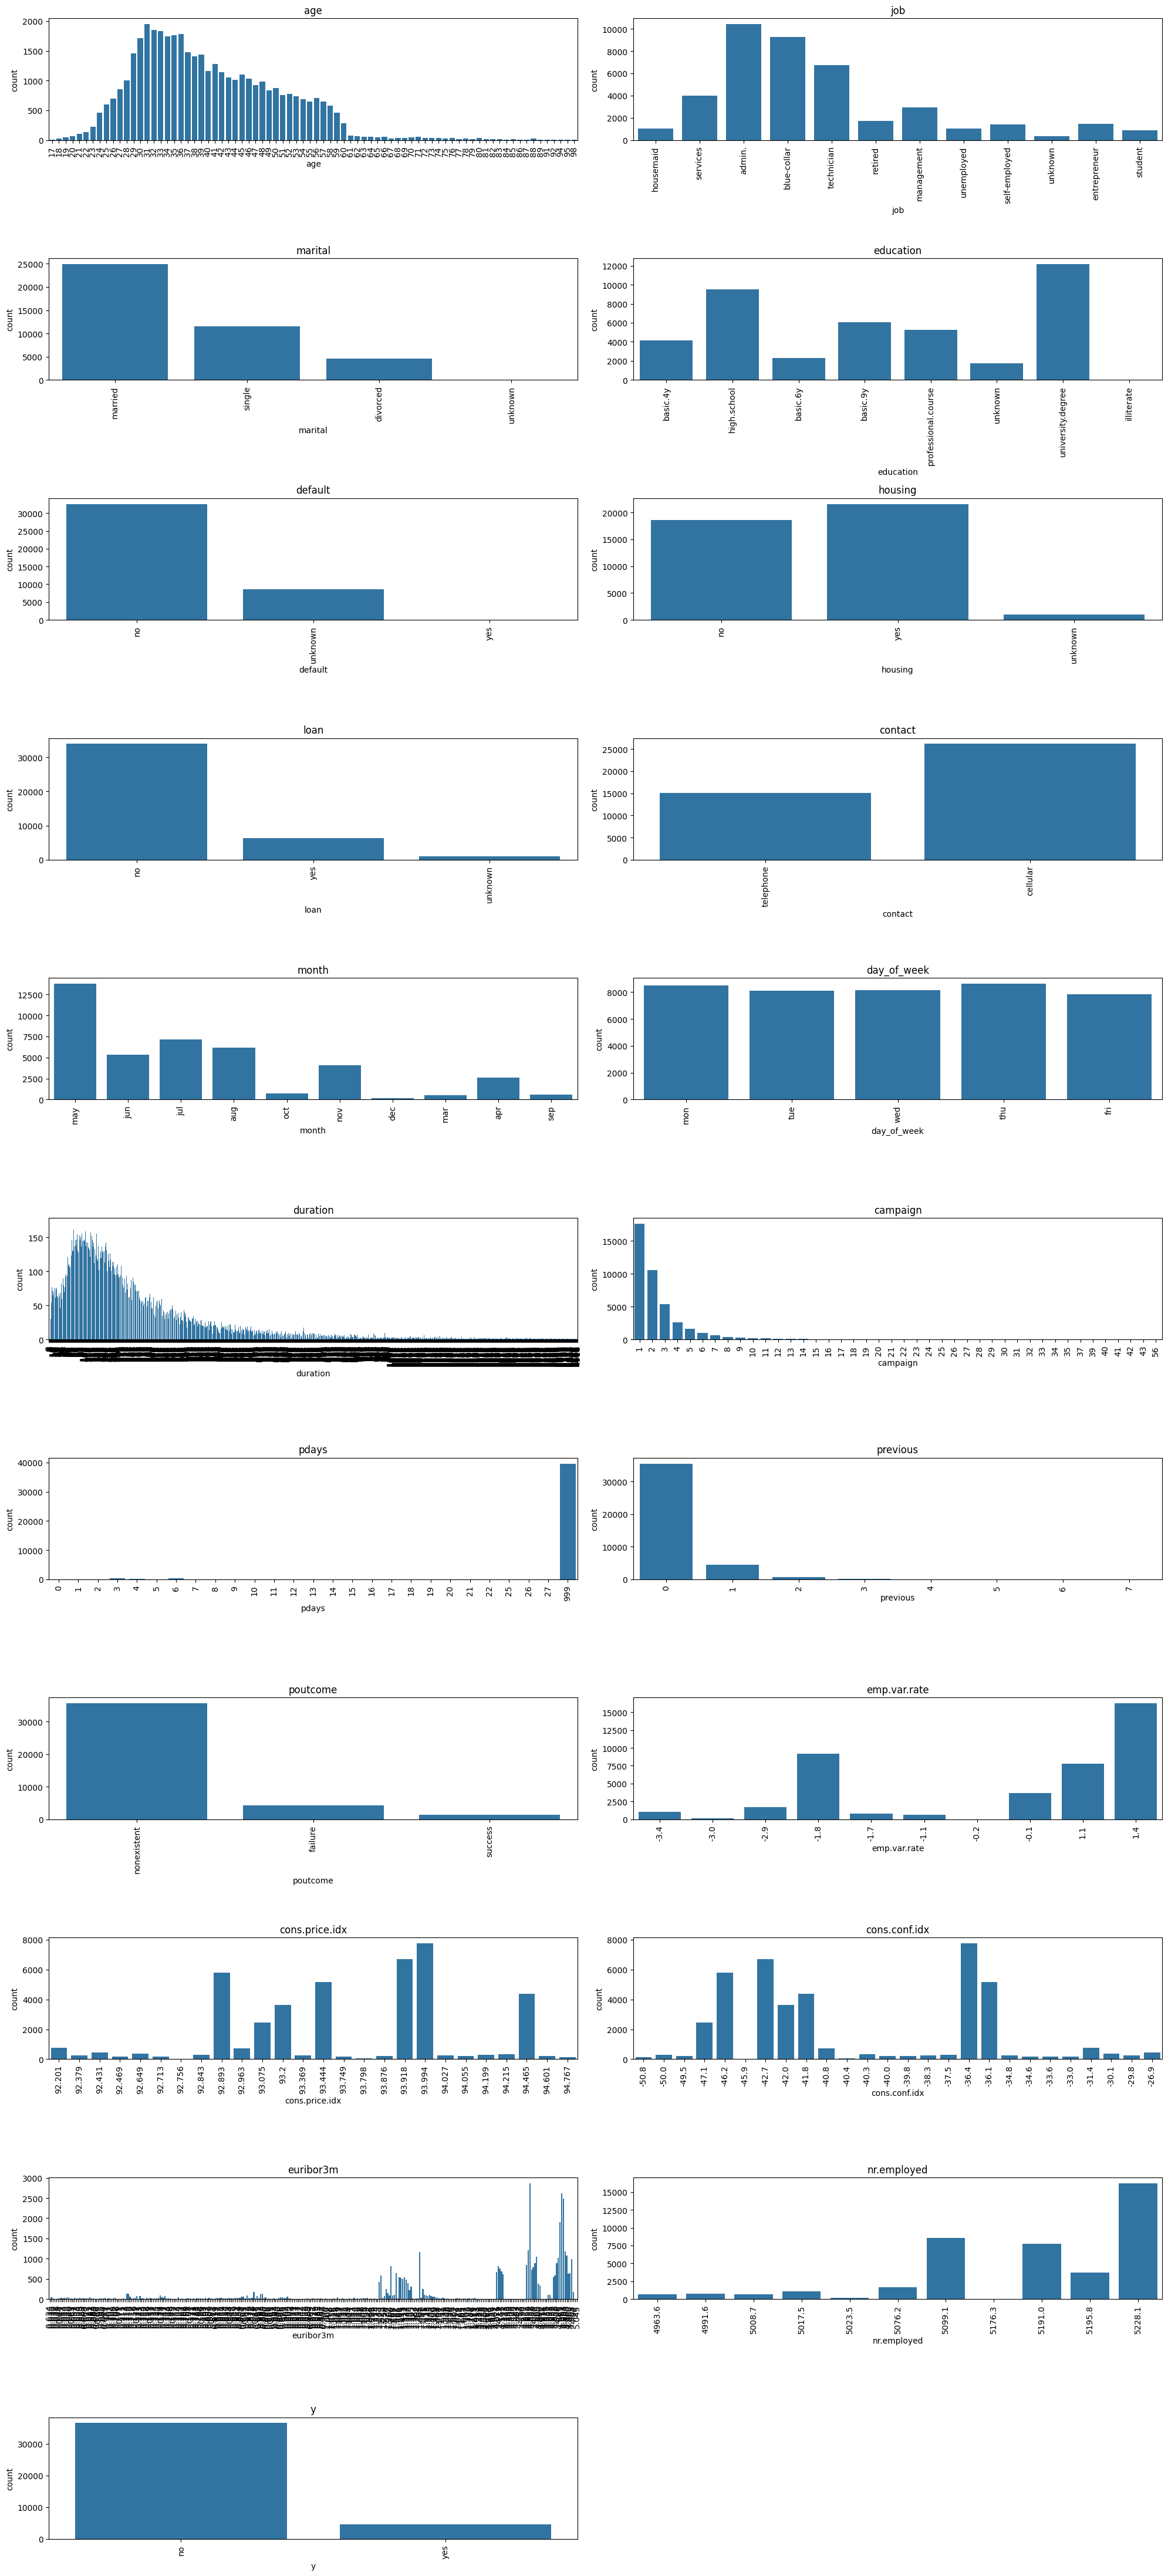

In [244]:
columnas = df.columns

n_cols = 2                      # 2 gráficos por fila
n_rows = math.ceil(len(columnas) / n_cols)   # filas necesarias

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

axes = axes.flatten()  # aplanar matriz de ejes

for i, col in enumerate(columnas):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=90)

# Ocultar ejes sobrantes
for j in range(len(columnas), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

<h3>Observaciones</h3>
la edad de las personas registrada esta comprendida entre 17 y 98 años con una mayoria entre los 29 y 41 años

Existen 12 categorias para el tipo de trabajo siendo administrador, técnicos y de mano de obra los 3 con mas registros y empleados domesticos y estudiantes los menos registrados

El estado civil puede ser casado, soltero  y divorsiado, con una minoria sin respuesta y mayormente casados

se tienen mas registros de personas con grado universitario  y con bachillerato

existen mayor registros de llamadas con poca duración

los registros por  dias entre semana no tienen alta variacion

las primeras campañas tienen mayor numero de regitros

el numero de registros es mayor durante los meses de mayo junio y julio, no se tienen registros para los meses de enero y febrero

la mayoria de los contactos no fue llamado desde la ultima campaña

con mayor euriborn han sido contactados mas clientes

a mayor  numero de empleados se han resgistrados a ma personas

<h4> tras analizar las varibles del dataset individualmente se ha decidido eliminar 5 de estas: nr.employed, cons.conf.idx, poutcome, day_of_week, default, las cuales no seran incluidas en los estudios posteriores

In [245]:
#variables a eliminar
df.drop(["nr.employed","cons.conf.idx","poutcome","day_of_week","default"], axis=1, inplace=True)
df.shape

(41188, 16)

# Análisis bivariante con la variable predictora "Y"  

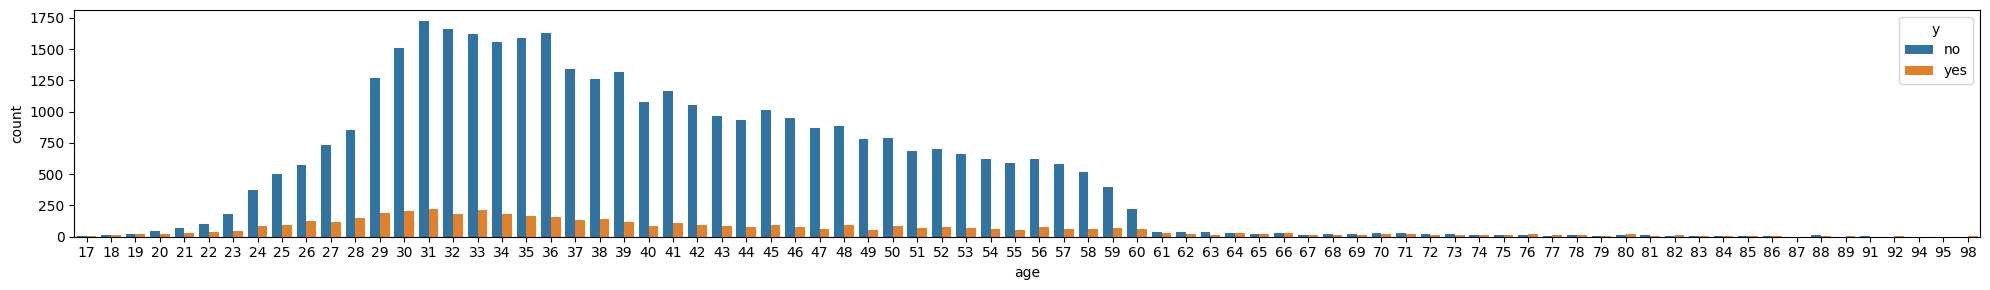

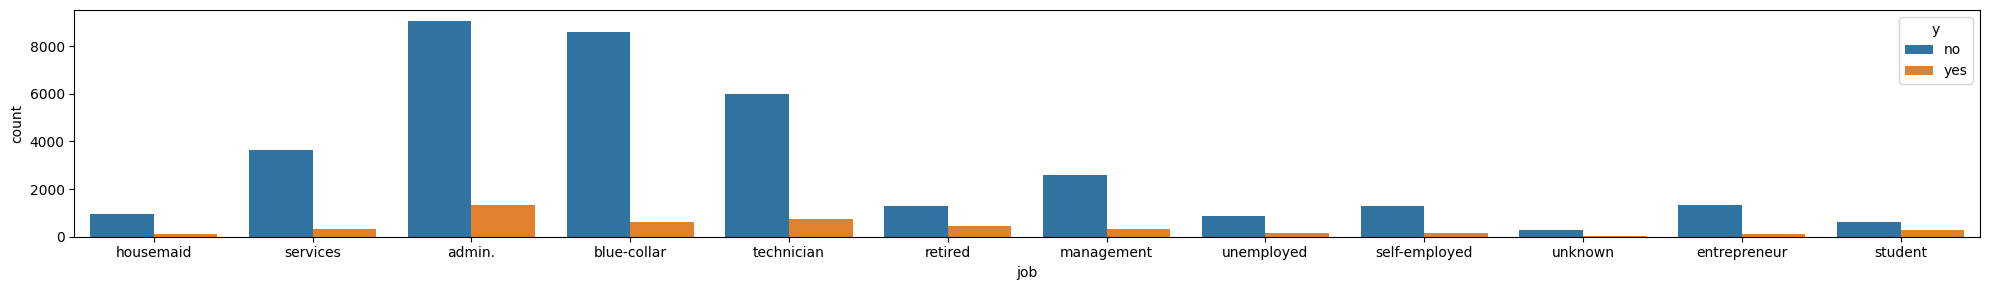

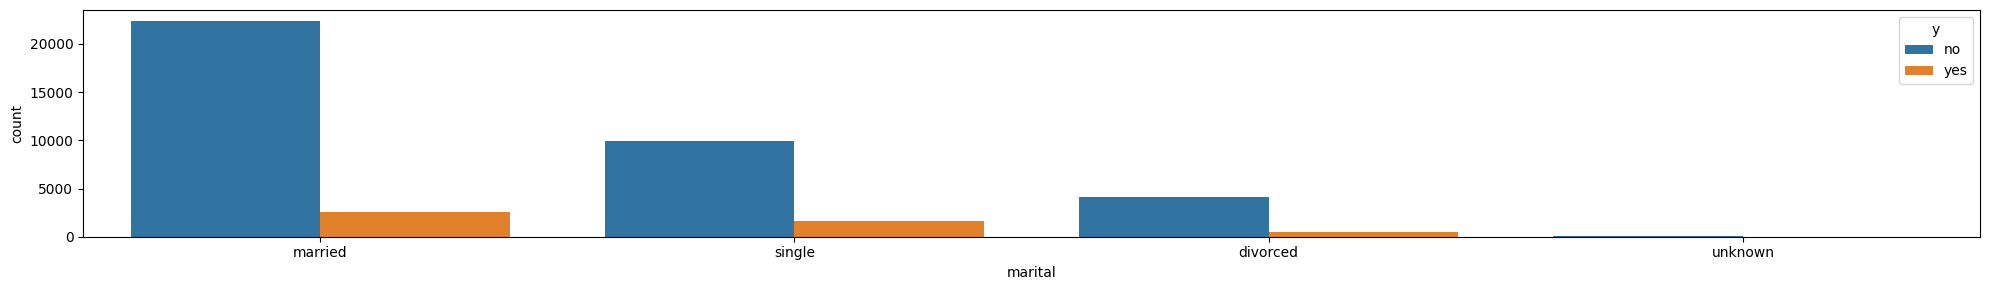

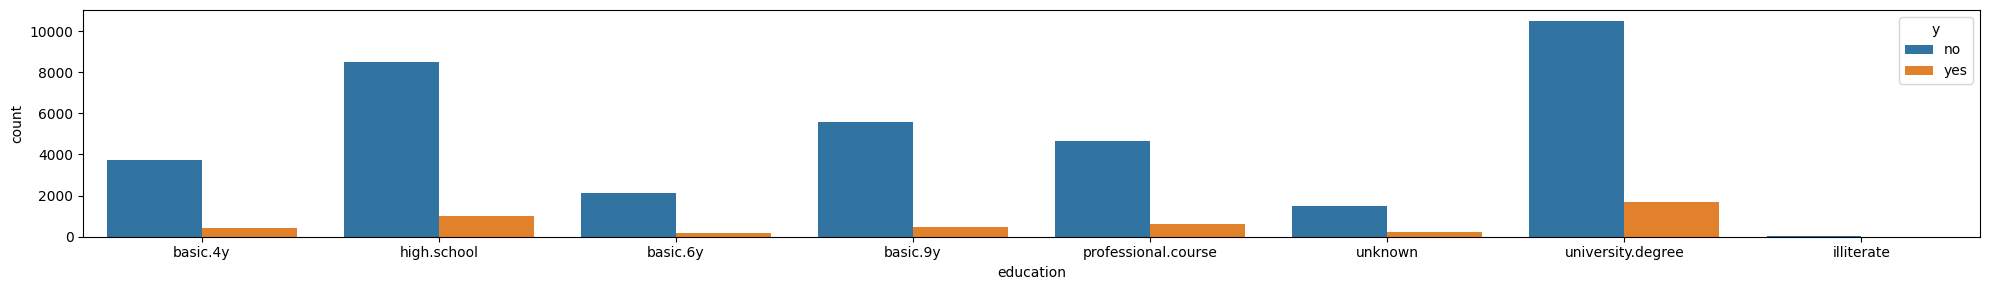

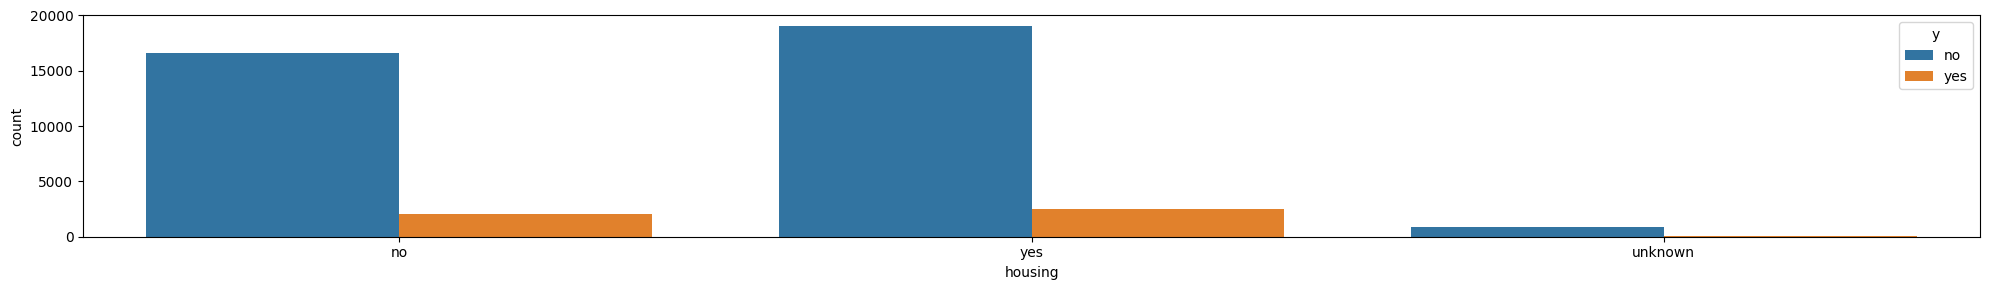

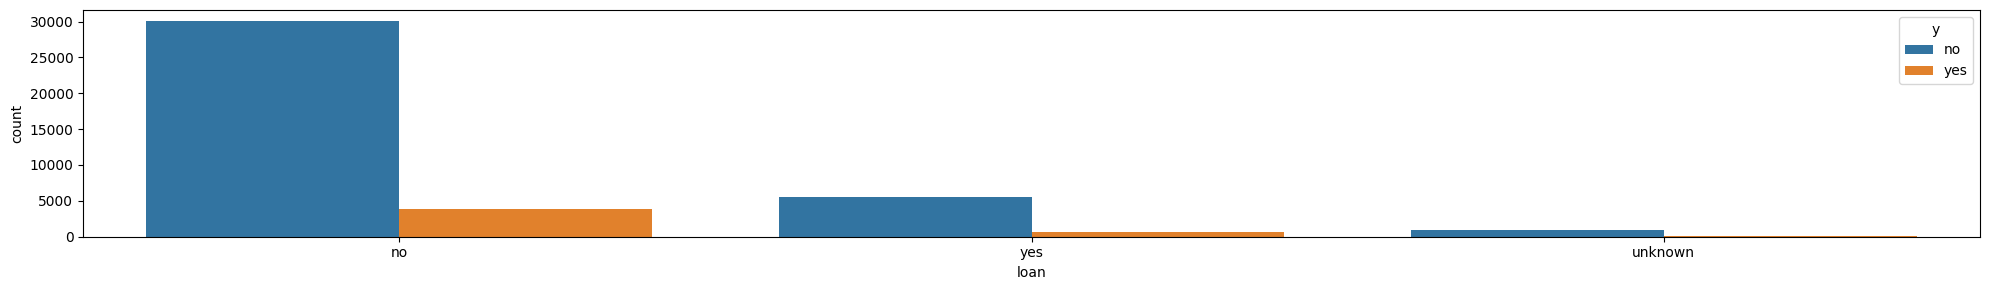

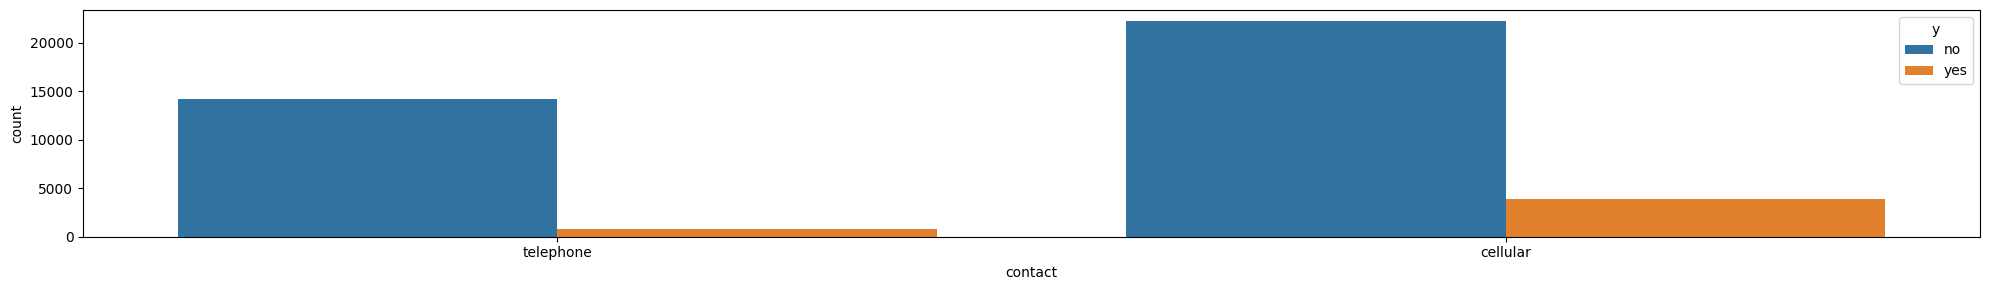

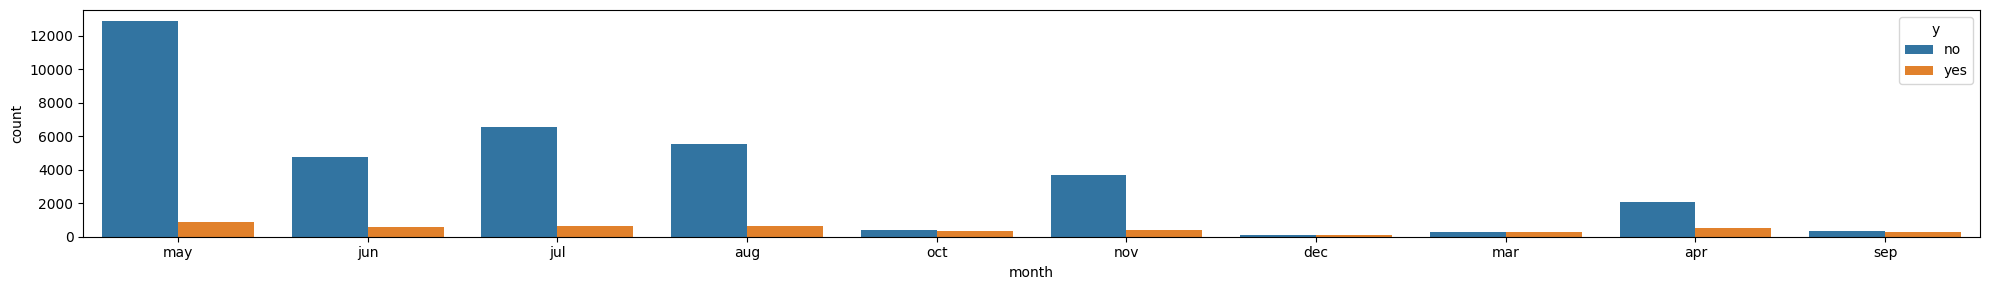

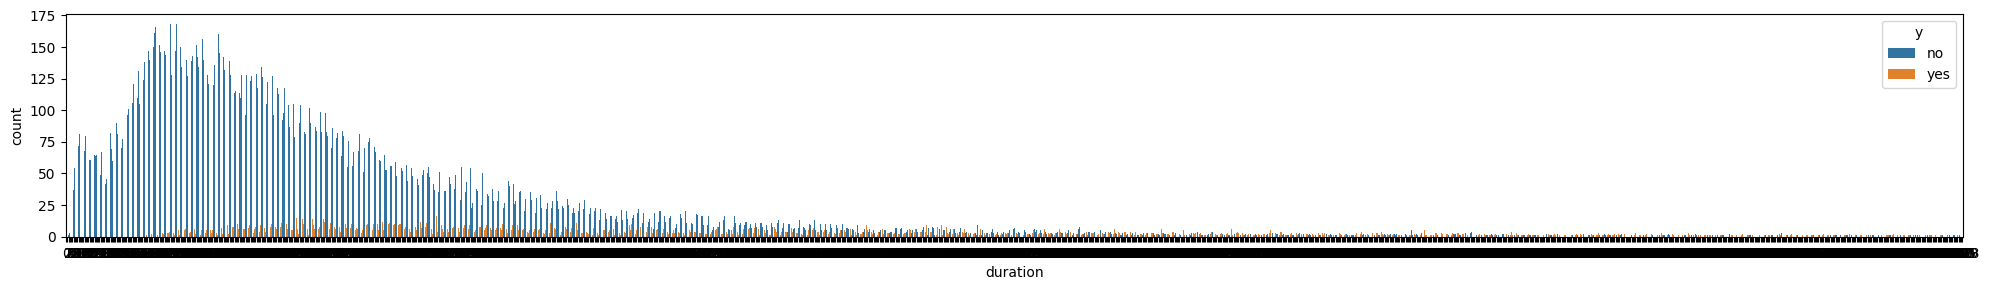

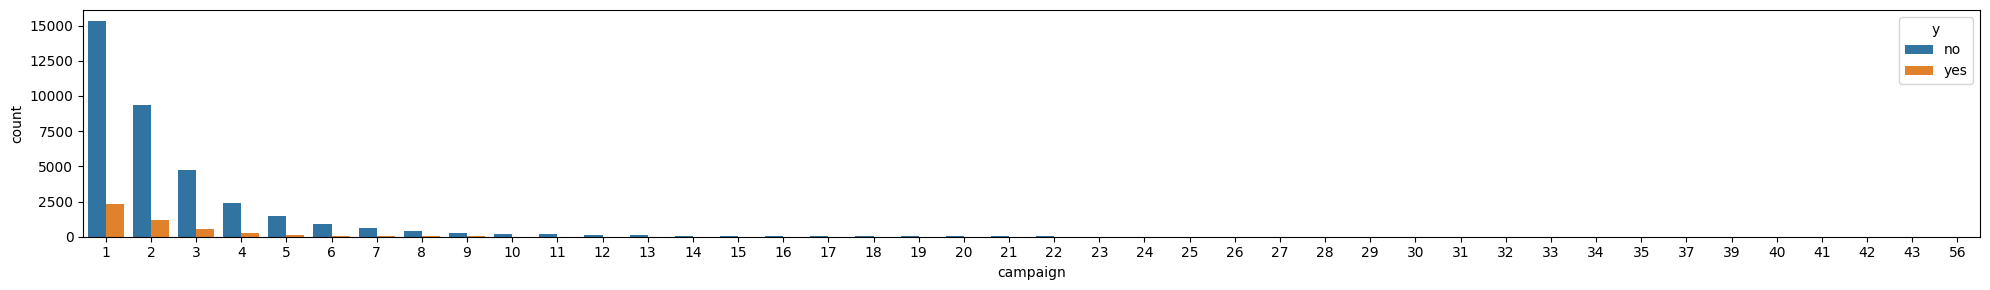

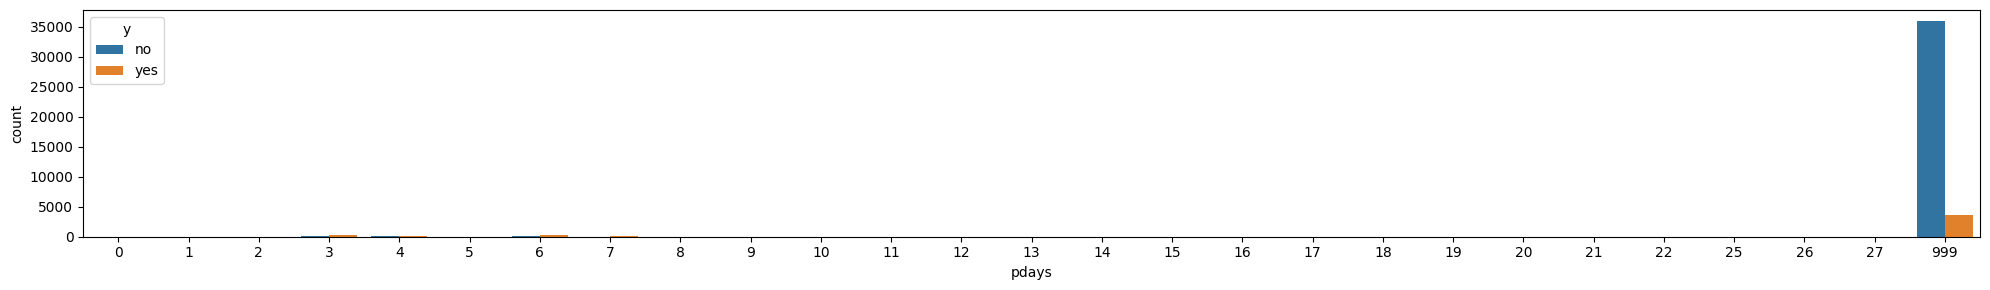

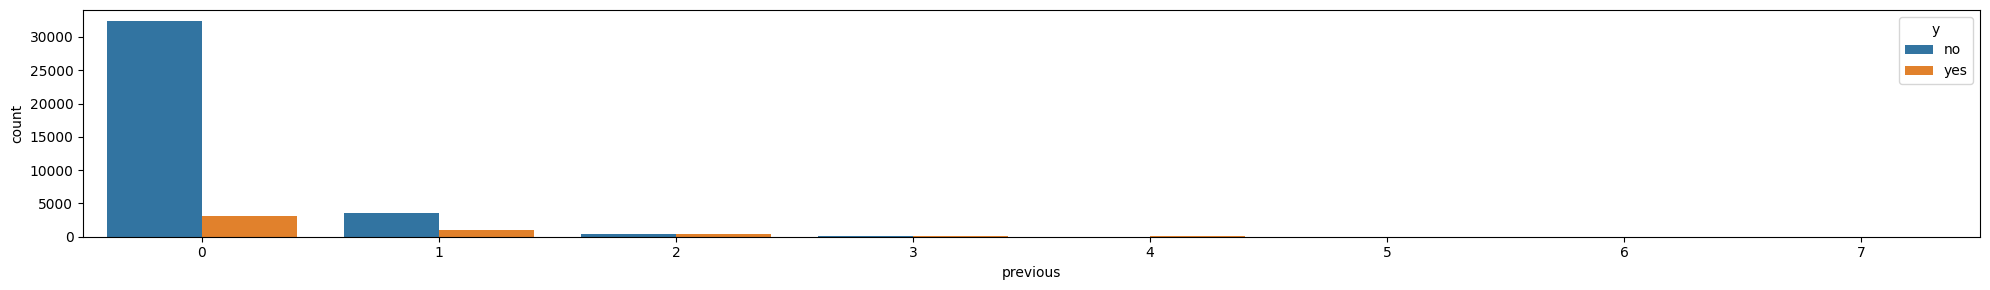

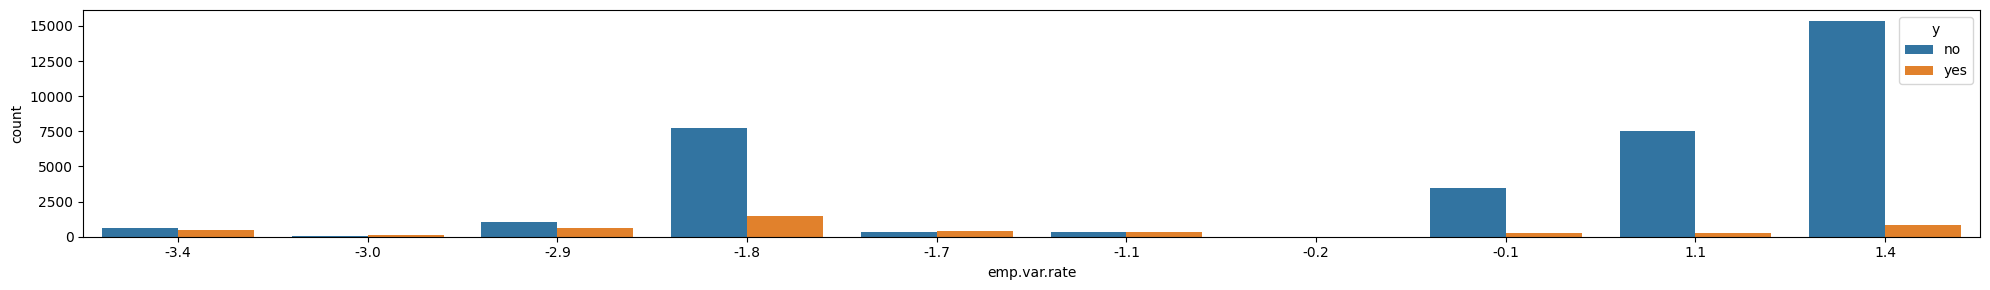

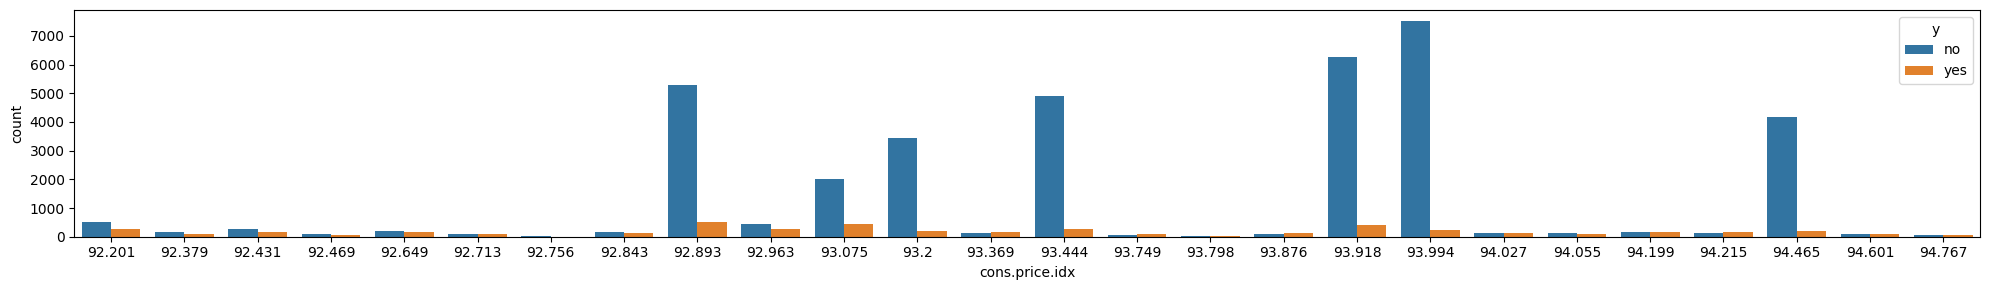

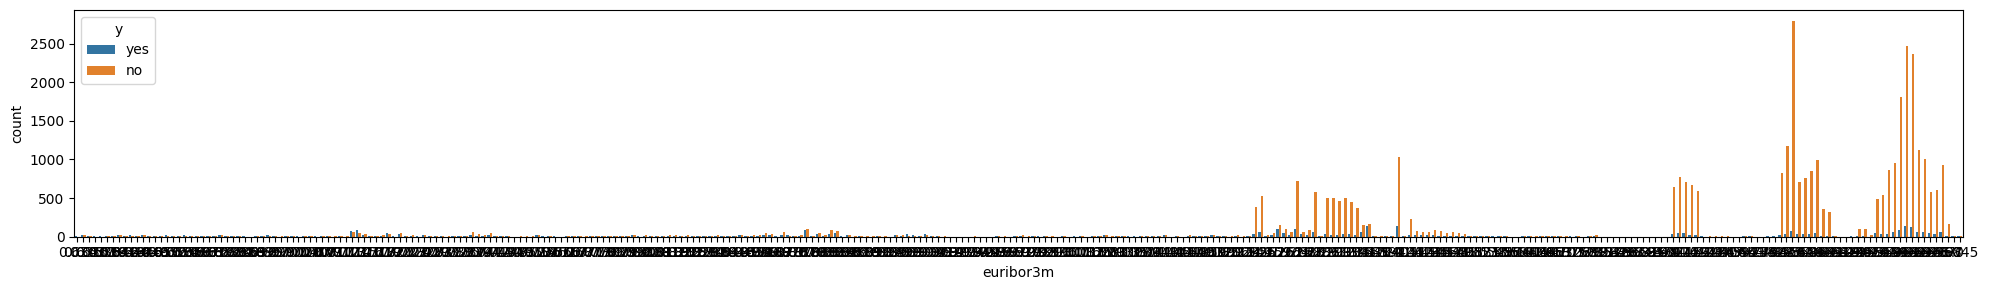

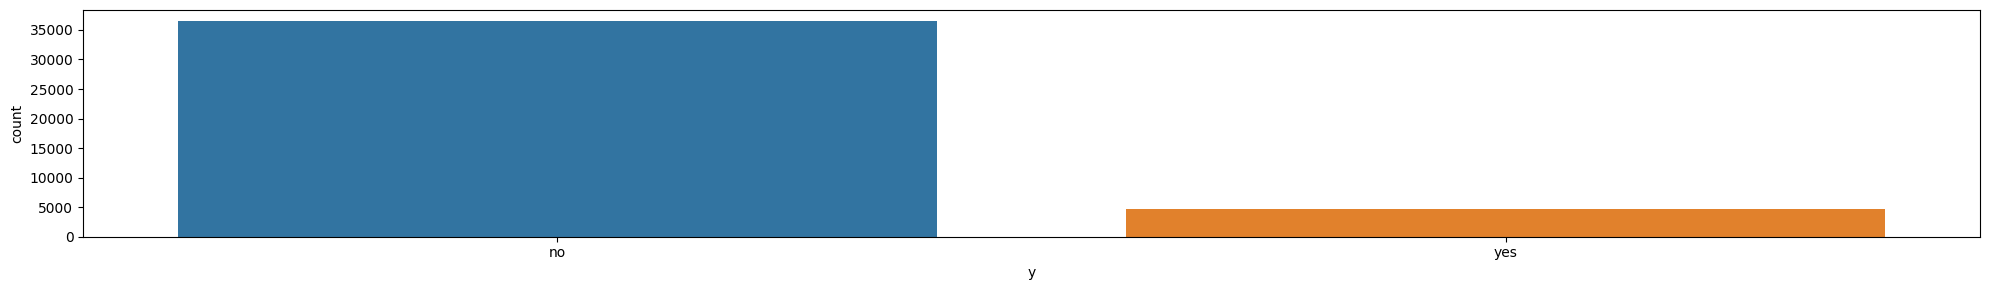

In [246]:
for columnas in df:
    fig, axis = plt.subplots(figsize=(20, 3))
    sns.countplot(data=df, x=columnas, hue="y")
    plt.tight_layout()
    plt.show()

Porcentajes de si y no segun la columna.

In [247]:
tabla1 = pd.crosstab(df["job"], df['y'], normalize='index') * 100
tabla2 = pd.crosstab(df["emp.var.rate"], df['y'], normalize='index') * 100
tabla3 = pd.crosstab(df["marital"], df['y'], normalize='index') * 100
tabla4 = pd.crosstab(df["education"], df['y'], normalize='index') * 100
tabla5 = pd.crosstab(df["pdays"], df['y'], normalize='index') * 100
tabla6 = pd.crosstab(df["campaign"], df['y'], normalize='index') * 100
tabla7 = pd.crosstab(df["month"], df['y'], normalize='index') * 100
tabla8 = pd.crosstab(df["cons.price.idx"], df['y'], normalize='index') * 100
tabla9 = pd.crosstab(df["previous"], df['y'], normalize='index') * 100


In [248]:
tabla1

y,no,yes
job,,
admin.,87.027442,12.972558
blue-collar,93.105684,6.894316
entrepreneur,91.483516,8.516484
housemaid,90.000000,10.000000
management,88.782490,11.217510
retired,74.767442,25.232558
self-employed,89.514426,10.485574
services,91.861930,8.138070
student,68.571429,31.428571


se observa que el mayor porcentaje de aceptacion de depositos lo tienen los estudiantes y los retirados, los que menos aceptan son los blue-collor.

In [249]:
tabla2

y,no,yes
emp.var.rate,,
-3.4,57.609711,42.390289
-3.0,48.837209,51.162791
-2.9,64.281419,35.718581
-1.8,84.091899,15.908101
-1.7,47.865459,52.134541
-1.1,52.598425,47.401575
-0.2,90.000000,10.000000
-0.1,93.700787,6.299213
1.1,96.908412,3.091588


se observa que cuando los datos tienen una tasa de variacion negativa, entonces tenemos mas aceptacion

In [250]:
tabla3

y,no,yes
marital,,
divorced,89.679098,10.320902
married,89.842747,10.157253
single,85.995851,14.004149
unknown,85.000000,15.000000


en general el promedio de aceptacion es muy bajo, con un 15% de personas de las cuales no se sabe su estado civil, 2do lugar los solteros y finalmente los divorciados

In [251]:
tabla4

y,no,yes
education,,
basic.4y,89.750958,10.249042
basic.6y,91.797557,8.202443
basic.9y,92.175352,7.824648
high.school,89.164477,10.835523
illiterate,77.777778,22.222222
professional.course,88.651535,11.348465
university.degree,86.275477,13.724523
unknown,85.499711,14.500289


el 22% de las personas analfabetas a aceptado la propuesta, las personas con basicos de estudio tienen el menor porcentaje de aceptacion

In [252]:
tabla5

y,no,yes
pdays,,
0,33.333333,66.666667
1,69.230769,30.769231
2,39.344262,60.655738
3,32.118451,67.881549
4,46.610169,53.389831
5,36.956522,63.043478
6,29.854369,70.145631
7,33.333333,66.666667
8,33.333333,66.666667


no se observa un tendencia muy marcada pero  se observan algunos  casos un poco extraños en donde el pdays con valores de 21, 25, 26 y 27 han tenido una aceptacion del 100%, cuantoss  registros se tienen en esos dias?

In [253]:
tabla6

y,no,yes
campaign,,
1,86.962929,13.037071
2,88.543046,11.456954
3,89.252949,10.747051
4,90.607318,9.392682
5,92.495310,7.504690
6,92.339122,7.660878
7,93.958665,6.041335
8,95.750000,4.250000
9,93.992933,6.007067


solo la primeras campañas tienen valores significativos de si o no.. a partir de la campaña 24 se deberia analizar cuantos registros hay realmente.

In [254]:
tabla7

y,no,yes
month,,
apr,79.521277,20.478723
aug,89.397863,10.602137
dec,51.098901,48.901099
jul,90.953443,9.046557
jun,89.488530,10.511470
mar,49.450549,50.549451
may,93.565255,6.434745
nov,89.856133,10.143867
oct,56.128134,43.871866


los meses de diciembre, marzo, septiembre, y octubre tienen mayor porcentaje de aceptacion... valdria la pena lanzar campañas en esos meses mas  que  en el resto del año?

In [255]:
tabla8

y,no,yes
cons.price.idx,,
92.201,65.714286,34.285714
92.379,60.299625,39.700375
92.431,59.731544,40.268456
92.469,62.921348,37.078652
92.649,52.941176,47.058824
92.713,48.837209,51.162791
92.756,90.000000,10.000000
92.843,55.319149,44.680851
92.893,90.956162,9.043838


no se tiene una tendencia marcada de aceptacion para los indicadores de nivel  de confianza

In [256]:
tabla9

y,no,yes
previous,,
0,91.167787,8.832213
1,78.798509,21.201491
2,53.580902,46.419098
3,40.740741,59.259259
4,45.714286,54.285714
5,27.777778,72.222222
6,40.000000,60.000000
7,100.000000,0.000000


las personas que han tenido entre 3 y 6 contactos durante la campaña anterion han tenido mayores porcentajes de aceptacion

<h3> Eliminacion de datos </h3>

In [257]:
#eliminar las filas cuyo numero de campaña es mayor que 23
df = df[df['campaign'] <= 23]
df.shape

(41088, 16)

# Correlación entre varibles

In [258]:
#factoriza nuestro target
df['y'] = pd.factorize(df['y'])[0]

In [259]:
#construccion de un dataframe auxiliar numerico para analisis de correlaciones entre las variables
df_numerico = df.select_dtypes(include=['number'])
df_numerico['number_job'] = pd.factorize(df['job'])[0]
df_numerico['number_marital'] = pd.factorize(df['marital'])[0]
df_numerico['number_education'] = pd.factorize(df['education'])[0]
df_numerico['number_housing'] = pd.factorize(df['housing'])[0]
df_numerico['number_loan'] = pd.factorize(df['loan'])[0]
df_numerico['number_month'] = pd.factorize(df['month'])[0]
df_numerico['number_contact'] = pd.factorize(df['contact'])[0]

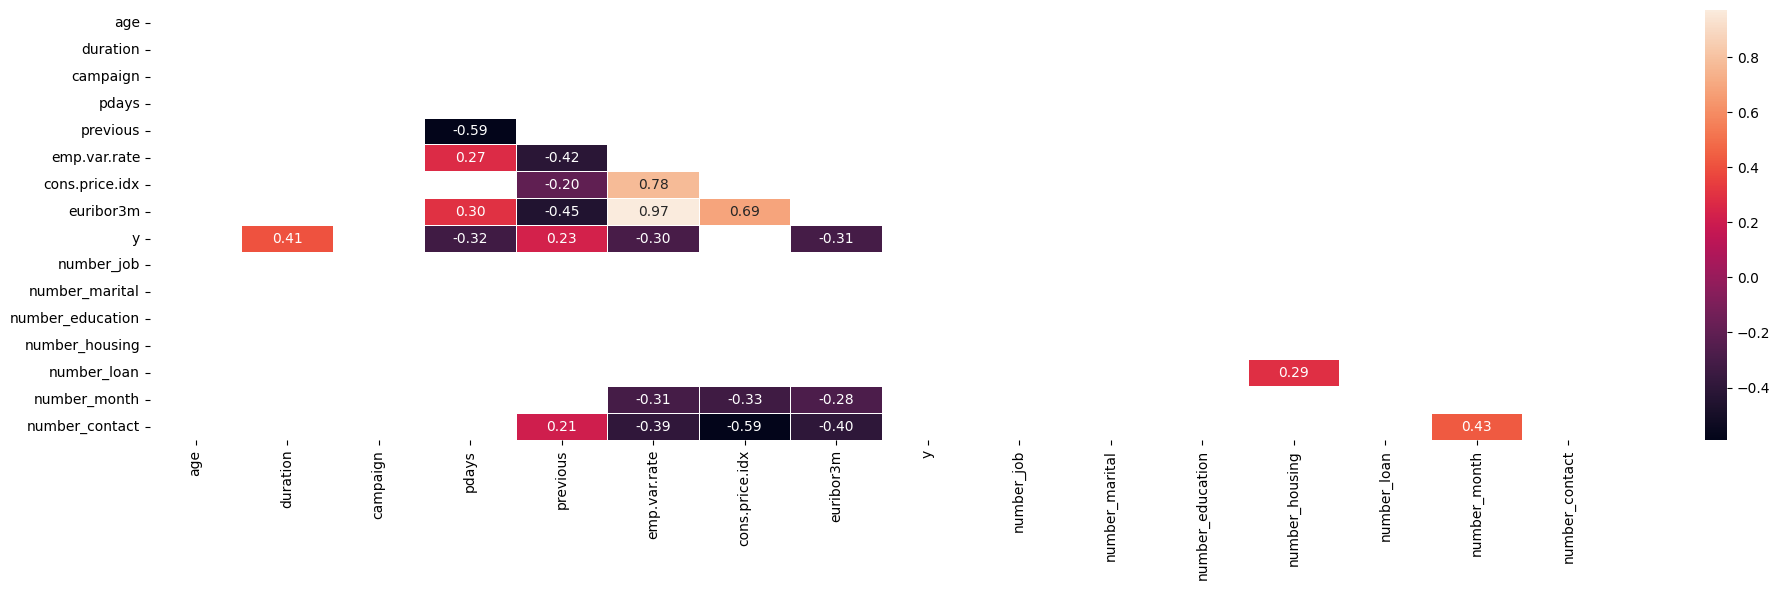

In [260]:
#correlacion de las variables con el df_numerico auxiliar
corr = df_numerico.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
significant_corr = corr[abs(corr) > 0.2]
significant_corr
fig, axis = plt.subplots(figsize=(20, 6))
sns.heatmap(significant_corr, mask=mask, annot=True, linewidths=0.5, fmt=".2f")
plt.tight_layout()
plt.show()

al observar una correlacion de 0.97 entre la variable de euribor3m y emp.var.rate se eliminira del dataframe la variable euriborn3m

In [261]:
df.drop(["euribor3m"], axis=1, inplace=True)

# Realizamos el split

In [262]:
# Dividimos el conjunto de datos en muestras de train y test
X = df.drop("y", axis=1)
y = df["y"]

# Instancia de: from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=18)

In [263]:
X_train

,age,job,marital,education,housing,loan,contact,month,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx
24553,50,blue-collar,married,basic.6y,yes,no,cellular,nov,116,2,999,1,-0.1,93.200
24135,34,admin.,single,high.school,no,no,cellular,nov,303,1,999,1,-0.1,93.200
9252,40,admin.,married,university.degree,yes,no,telephone,jun,66,3,999,0,1.4,94.465
20425,51,entrepreneur,married,basic.4y,no,no,cellular,aug,148,2,999,0,1.4,93.444
16633,38,technician,single,professional.course,unknown,unknown,cellular,jul,361,2,999,0,1.4,93.918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,37,housemaid,married,high.school,no,no,telephone,may,138,6,999,0,1.1,93.994
1726,59,admin.,married,university.degree,no,yes,telephone,may,186,1,999,0,1.1,93.994
35753,52,admin.,divorced,high.school,yes,no,telephone,may,54,2,999,1,-1.8,92.893
25820,40,technician,married,basic.9y,no,no,cellular,nov,59,1,999,0,-0.1,93.200


In [264]:
y_test.shape

(8218,)

In [265]:
y_train

24553    0
24135    0
9252     0
20425    0
16633    0
        ..
5301     0
1726     0
35753    0
25820    0
29047    0
Name: y, Length: 32870, dtype: int64

#  Scaling & Encoding 

In [ ]:
# # 0. Creamos copias de los conjuntos de entrenamiento: X_train | X_test
X_train_cat_le = X_train.copy()
X_test_cat_le = X_test.copy()

#Para cada variable no numerica la transformamos en numerica y  la abregamos a nuestra copia de x_train

# 1. Creamos las instancias del encoder
label_encoder_job = LabelEncoder()
# 2. Entrenamos los encoders con los datos de entrenamiento (ajustamos) fit
label_encoder_job.fit(X_train['job'])
# 3. Aplicamos el encoder en ambos conjuntos (entrenamiento y test) transform
X_train_cat_le['job_le'] = label_encoder_job.transform(X_train['job'])
X_test_cat_le['job_le'] = label_encoder_job.transform(X_test['job'])


# 1. Creamos las instancias del encoder
label_encoder_marital = LabelEncoder()
# 2. Entrenamos los encoders con los datos de entrenamiento (ajustamos) utilizamos: fit()
label_encoder_marital.fit(X_train['marital'])
# 3. Aplicamos el encoder en ambos conjuntos (entrenamiento y test) transform
X_train_cat_le['marital_le'] = label_encoder_marital.transform(X_train['marital'])  # 3.1 train
X_test_cat_le['marital_le'] = label_encoder_marital.transform(X_test['marital'])  # 3.2 test

# 1. Creamos las instancias del encoder
label_encoder_education = LabelEncoder()
# 2. Entrenamos los encoders con los datos de entrenamiento (ajustamos) fit
label_encoder_education.fit(X_train['education'])
# 3. Aplicamos el encoder en ambos conjuntos (entrenamiento y test) transform
X_train_cat_le['education_le'] = label_encoder_education.transform(X_train['education'])
X_test_cat_le['education_le'] = label_encoder_education.transform(X_test['education'])


# 1. Creamos las instancias del encoder
label_encoder_housing = LabelEncoder()
# 2. Entrenamos los encoders con los datos de entrenamiento (ajustamos) utilizamos: fit()
label_encoder_housing.fit(X_train['housing'])
# 3. Aplicamos el encoder en ambos conjuntos (entrenamiento y test) transform
X_train_cat_le['housing_le'] = label_encoder_housing.transform(X_train['housing'])  # 3.1 train
X_test_cat_le['housing_le'] = label_encoder_housing.transform(X_test['housing'])  # 3.2 test

# 1. Creamos las instancias del encoder
label_encoder_month = LabelEncoder()
# 2. Entrenamos los encoders con los datos de entrenamiento (ajustamos) fit
label_encoder_month.fit(X_train['month'])
# 3. Aplicamos el encoder en ambos conjuntos (entrenamiento y test) transform
X_train_cat_le['month_le'] = label_encoder_month.transform(X_train['month'])
X_test_cat_le['month_le'] = label_encoder_month.transform(X_test['month'])

# 1. Creamos las instancias del encoder
label_encoder_loan = LabelEncoder()
# 2. Entrenamos los encoders con los datos de entrenamiento (ajustamos) fit
label_encoder_loan.fit(X_train['loan'])
# 3. Aplicamos el encoder en ambos conjuntos (entrenamiento y test) transform
X_train_cat_le['loan_le'] = label_encoder_loan.transform(X_train['loan'])
X_test_cat_le['loan_le'] = label_encoder_loan.transform(X_test['loan'])


# 1. Creamos las instancias del encoder
label_encoder_contact = LabelEncoder()
# 2. Entrenamos los encoders con los datos de entrenamiento (ajustamos) utilizamos: fit()
label_encoder_contact.fit(X_train['contact'])
# 3. Aplicamos el encoder en ambos conjuntos (entrenamiento y test) transform
X_train_cat_le['contact_le'] = label_encoder_contact.transform(X_train['contact'])  # 3.1 train
X_test_cat_le['contact_le'] = label_encoder_contact.transform(X_test['contact'])  # 3.2 test


In [267]:
#dudas sobre como guardar
# Guardamos utilizando Pickle (que nos permite guardar objetos de Python)
#with open('/workspaces/betaniammc-machine-learning/models/logistic-regression-label-encoder.pkl', 'wb') as file:
#   pickle.dump(label_encoder_contact, file)
#with open('/workspaces/betaniammc-machine-learning/models/logistic-regression-label-encoder.pkl', 'wb') as file:
#    pickle.dump(label_encoder_job, file)
#with open('/workspaces/betaniammc-machine-learning/models/logistic-regression-label-encoder.pkl', 'wb') as file:
#    pickle.dump(label_encoder_loan, file)
#with open('/workspaces/betaniammc-machine-learning/models/logistic-regression-label-encoder.pkl', 'wb') as file:
#    pickle.dump(label_encoder_month, file)
#with open('/workspaces/betaniammc-machine-learning/models/logistic-regression-label-encoder.pkl', 'wb') as file:
#    pickle.dump(label_encoder_education, file)
#with open('/workspaces/betaniammc-machine-learning/models/logistic-regression-label-encoder.pkl', 'wb') as file:
#    pickle.dump(label_encoder_marital, file)

# Normalizacion de los datos

In [268]:
X_train_cat_le.head()

,age,job,marital,education,housing,loan,contact,month,duration,campaign,...,previous,emp.var.rate,cons.price.idx,job_le,marital_le,education_le,housing_le,month_le,loan_le,contact_le
24553,50,blue-collar,married,basic.6y,yes,no,cellular,nov,116,2,...,1,-0.1,93.200,1,1,1,2,7,0,0
24135,34,admin.,single,high.school,no,no,cellular,nov,303,1,...,1,-0.1,93.200,0,2,3,0,7,0,0
9252,40,admin.,married,university.degree,yes,no,telephone,jun,66,3,...,0,1.4,94.465,0,1,6,2,4,0,1
20425,51,entrepreneur,married,basic.4y,no,no,cellular,aug,148,2,...,0,1.4,93.444,2,1,0,0,1,0,0
16633,38,technician,single,professional.course,unknown,unknown,cellular,jul,361,2,...,0,1.4,93.918,9,2,5,1,3,1,0


In [269]:
#Realizar el escalado con el dataset dividido solo con las variables numericas
norm_scaler = StandardScaler()  # Instancia de: from sklearn.preprocessing import StandardScaler

num_variables = ["age",	"duration",	"campaign",	"pdays", "previous", "emp.var.rate", "cons.price.idx", "job_le", "marital_le", "education_le", "housing_le", "month_le", "loan_le", "contact_le"]
norm_features_x_train = norm_scaler.fit_transform(X_train_cat_le[num_variables])
norm_features_x_test = norm_scaler.transform(X_test_cat_le[num_variables])

X_train_cat_le_scaled = pd.DataFrame(norm_features_x_train,
                       index=X_train_cat_le.index,
                       columns=num_variables)
X_test_cat_le_scaled = pd.DataFrame(norm_features_x_test,
                       index=X_test_cat_le.index,
                       columns=num_variables)
X_train_cat_le_scaled.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,job_le,marital_le,education_le,housing_le,month_le,loan_le,contact_le
24553,0.961857,-0.557983,-0.209023,0.194401,1.674045,-0.115611,-0.648085,-0.754787,-0.278421,-1.287016,0.944854,1.192729,-0.451623,-0.757334
24135,-0.577882,0.170165,-0.623437,0.194401,1.674045,-0.115611,-0.648085,-1.033246,1.360491,-0.350554,-1.084044,1.192729,-0.451623,-0.757334
9252,-0.000480,-0.752675,0.205392,0.194401,-0.349783,0.839468,1.537661,-1.033246,-0.278421,1.054139,0.944854,-0.098183,-0.451623,1.320421
20425,1.058091,-0.433380,-0.209023,0.194401,-0.349783,0.839468,-0.226486,-0.476328,-0.278421,-1.755247,-1.084044,-1.389095,-0.451623,-0.757334
16633,-0.192948,0.396008,-0.209023,0.194401,-0.349783,0.839468,0.592520,1.472884,1.360491,0.585908,-0.069595,-0.528487,0.931223,-0.757334


In [270]:
X_test_cat_le_scaled

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,job_le,marital_le,education_le,housing_le,month_le,loan_le,contact_le
22142,0.961857,0.053350,-0.623437,0.194401,-0.349783,0.839468,-0.226486,0.637507,-0.278421,1.054139,-1.084044,-1.389095,-0.451623,-0.757334
39494,1.635493,0.575125,-0.209023,0.194401,-0.349783,-1.198034,0.300512,0.359048,-0.278421,-0.350554,0.944854,-1.819399,-0.451623,-0.757334
6703,-1.251518,-0.826658,-0.623437,0.194401,-0.349783,0.648452,0.723838,-0.754787,-0.278421,-1.287016,-1.084044,0.762425,-0.451623,1.320421
5828,-0.385415,-0.877278,0.205392,0.194401,-0.349783,0.648452,0.723838,-0.754787,-0.278421,-0.350554,-1.084044,0.762425,-0.451623,1.320421
34171,-0.577882,-0.522938,0.205392,0.194401,-0.349783,-1.198034,-1.178538,-0.754787,1.360491,-1.287016,0.944854,0.762425,-0.451623,-0.757334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4536,-0.866583,-0.503469,-0.209023,0.194401,-0.349783,0.648452,0.723838,1.472884,-0.278421,0.585908,0.944854,0.762425,-0.451623,1.320421
26481,-0.577882,-0.297096,-0.209023,0.194401,1.674045,-0.115611,-0.648085,1.472884,-0.278421,1.054139,-1.084044,1.192729,-0.451623,-0.757334
41166,-0.770350,1.525222,-0.623437,0.194401,1.674045,-0.752330,2.059475,-1.033246,-0.278421,1.054139,-1.084044,1.192729,-0.451623,1.320421
30277,-0.096714,0.637426,-0.209023,0.194401,-0.349783,-1.198034,-0.864068,1.472884,-0.278421,0.585908,0.944854,-1.819399,-0.451623,-0.757334


# Genera y entrena el modelo

In [271]:
# Genera el modelo: genera una instancia de la clase LogisticRegression / Creando el modelo (vacío)
model = LogisticRegression(random_state=18)

# Entrena
model.fit(X_train_cat_le_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,18
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


# Predicción del modelo

Una vez se ha entrenado el modelo, se puede utilizar para predecir con el conjunto de datos de prueba.

In [272]:
y_pred = model.predict(X_test_cat_le_scaled)
y_pred

array([0, 1, 0, ..., 1, 0, 0], shape=(8218,))

In [273]:
len(y_pred)

8218

Existe una gran cantidad de métricas para medir la efectividad de un modelo a la hora de predecir, entre ellas la **precisión** (*accuracy*), que es la fracción de predicciones que el modelo realizó correctamente.

In [274]:
model_accuracy = accuracy_score(y_test, y_pred)
model_accuracy

0.908980287174495

# Matriz de confusion

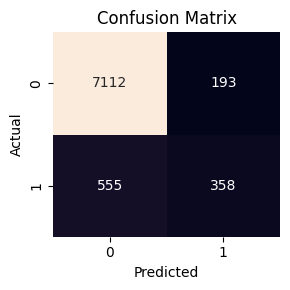

In [275]:
banco_ingreso = confusion_matrix(y_test, y_pred)

# Dibujaremos esta matriz para hacerla más visual
df_cm = pd.DataFrame(banco_ingreso)

plt.figure(figsize=(3, 3))
sns.heatmap(df_cm, annot=True, fmt="d", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()

La interpretación de una matriz de confusión es la siguiente:

- **Verdaderos positivos** (*TP, True positive*): 358.
El modelo predijo SÍ y la persona realmente SÍ aceptó.
Acertó 358 clientes que realmente dicen SÍ.
- **Verdaderos negativos** (*TN, False negative*): 7112.
El modelo predijo NO y la persona en realidad NO aceptó. El modelo acertó 7112 veces con los NO.
- **Falsos positivos** (*FP, False positive*): 193
El modelo predijo SÍ, pero en realidad la persona NO aceptó. Errores donde el modelo "confunde" un NO como un SÍ. Esto es importante porque puede significar que estás gastando esfuerzos en clientes que finalmente no aceptan.
- **Falsos negativos** (*FN, False negative*): 555. El modelo predijo NO, pero la persona en realidad SÍ aceptó.
El modelo dejó escapar clientes que habrían aceptado el producto. Este tipo de error puede costar oportunidades reales de venta.


# Paso 4: Optimización de resultados

Como hemos visto, el modelo base (con todos los parámetros predefinidos) de la regresión logística obtiene solo un poco más de un 72% de precisión. Sin embargo, el hecho de modificar los parámetros del modelo podría suponer una mejora (o empeoramiento) significativos de los resultados. Existen varias estrategias como los modelos regularizados.

In [276]:
# Definimos los parámetros que queremos ajustar a mano
hyperparams = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
               'penalty': ['l1', 'l2', 'elasticnet', None],
               'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Inicializamos la cuadrícula
grid = GridSearchCV(model,
                    hyperparams,
                    scoring="accuracy",
                    cv=5)
grid

,estimator,LogisticRegre...ndom_state=18)
,param_grid,"{'C': [0.001, 0.01, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['newton-cg', 'lbfgs', ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [277]:
grid.fit(X_train_cat_le_scaled, y_train)

grid.best_params_

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1232: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1232: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1232: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1232: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1232: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1232: U

{'C': 0.001, 'penalty': None, 'solver': 'newton-cg'}

Como vemos, los parámetros optimizados utilizando esta técnica son:

- `C`: 0.001
- `penalty`: None
- `solver`: newton-cg

Además, siempre debemos utilizar el conjunto de datos de entrenamiento para ajustarlo. Ahora solo tenemos que repetir el entrenamiento estableciendo estos parámetros en el modelo:

In [281]:
grid.best_estimator_

,penalty,None
,dual,False
,tol,0.0001
,C,0.001
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,18
,solver,'newton-cg'
,max_iter,100
,multi_class,'deprecated'


In [279]:
# best_model_grid = LogisticRegression(penalty='l1',
#                                      C=1,
#                                      solver='liblinear')
# best_model_grid.fit(X_train, y_train)
best_model_grid = grid.best_estimator_

y_pred_grid = best_model_grid.predict(X_train_cat_le_scaled,)

grid_accuracy = accuracy_score(y_train, y_pred_grid)

model_accuracy, grid_accuracy

(0.908980287174495, 0.9080620626711287)

In [280]:
grid_accuracy - model_accuracy

-0.0009182245033663161

aqui podemos observar que el modelo no ha mejorado y que ha desmejorado en un 0.09% tomandose el primero como acepatable